In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import csv

In [48]:
# Load data
path = './files/hotel_booking_demand/hotel_bookings.csv'
data_csv = []
with open(path, mode = "r", encoding = 'utf-8') as f:
    data_reader_csv = csv.reader(f)
    for index, row in enumerate(data_reader_csv):
        data_csv.append(row)
df_csv = np.array(data_csv)
df_csv

array([['hotel', 'is_canceled', 'lead_time', ...,
        'total_of_special_requests', 'reservation_status',
        'reservation_status_date'],
       ['Resort Hotel', '0', '342', ..., '0', 'Check-Out', '2015-07-01'],
       ['Resort Hotel', '0', '737', ..., '0', 'Check-Out', '2015-07-01'],
       ...,
       ['City Hotel', '0', '34', ..., '4', 'Check-Out', '2017-09-07'],
       ['City Hotel', '0', '109', ..., '0', 'Check-Out', '2017-09-07'],
       ['City Hotel', '0', '205', ..., '2', 'Check-Out', '2017-09-07']],
      dtype='<U30')

In [71]:
# Mẫu của 1 row(observation)
df_csv[0]

array(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'], dtype='<U30')

In [72]:
# Tổng số dòng
df_csv.shape

(119391, 32)

In [73]:
df_csv.size

3820512

In [74]:
df_csv.dtype

dtype('<U30')

In [75]:
df_csv.ndim

2

In [168]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [159]:
# 1- Tìm hiểu có bao nhiêu loại hotel - dữ liệu trải dài trong bao nhiêu năm
hotel_list = []
year_list = []
year_index = np.where(df_csv[0] == 'arrival_date_year')[0][0]
hotel_index = np.where(df_csv[0] == 'hotel')[0][0]
for index,row in enumerate(df_csv):
    if index == 0:continue
    hotel_list.append(row[hotel_index])
    year_list.append(row[year_index])
hotel_type = list(set(hotel_list))
years = list(set(year_list))

In [249]:
years = list(np.sort(years))
years

['2015', '2016', '2017']

In [250]:
hotel_type

['Resort Hotel', 'City Hotel']

In [251]:
# 2- Tính tổng doanh thu, doanh thu từng loại hotel, doanh thu theo năm
# revenue = (stays_in_weekend_nights + stays_in_week_nights) * adr 
revenue = []
stay_night = []

#Lấy Index các attribute
week_night_index = np.where(df_csv[0] == 'stays_in_weekend_nights')[0][0]
weekend_night_index = np.where(df_csv[0] == 'stays_in_week_nights')[0][0]
ard_index = np.where(df_csv[0] == 'adr')[0][0]

for index,row in enumerate(df_csv):
    if index == 0:continue
    nights = int(row[week_night_index]) + int(row[weekend_night_index])
    revenue.append(float(row[ard_index]) * nights)
    stay_night.append(nights)

    

In [252]:
print(f'Doanh thu tổng các năm: ${np.sum(revenue):,}')

Doanh thu tổng các năm: $42,723,497.53


In [253]:
revenue_by_year ={}
for year in years:
    revenue_by_year[year] = []
    for index,row in enumerate(df_csv):
        if index == 0:continue
        if year == row[year_index]:
            nights = int(row[week_night_index]) + int(row[weekend_night_index])
            revenue_by_year[year].append(float(row[ard_index]) * nights)

In [254]:
for year in revenue_by_year:
    print(f'Doanh thu của {color.BOLD}{year}{color.END} là {color.BOLD}${np.sum(revenue_by_year[year]):,.2f}{color.END}')   

Doanh thu của 2015 là $6,818,116.56
Doanh thu của 2016 là $18,870,601.20
Doanh thu của 2017 là $17,034,779.77


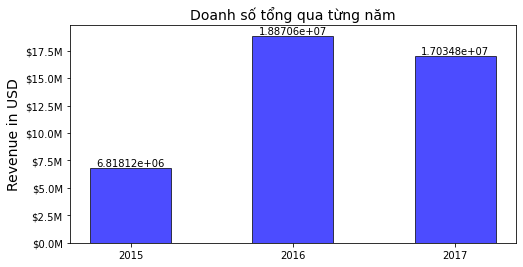

In [258]:
# Vẽ biểu đồ thể hiện doanh số qua các năm
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)

fig, ax = plt.subplots(figsize = (8,4))
ax.bar(list(revenue_by_year.keys()),[np.sum(revenue_by_year[year]) for year in revenue_by_year],color = 'blue',alpha= 0.7, edgecolor = "k", width = 0.5)
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Revenue in USD',fontsize = 14)

#Hiện giá trị lên từng cột
ax.bar_label(container = ax.containers[0])

plt.title('Doanh số tổng qua từng năm', fontsize = 14)
plt.show()

In [259]:
revenue_by_hotel ={}
for hotel in hotel_type:
    revenue_by_hotel[hotel] = []
    for index,row in enumerate(df_csv):
        if index == 0:continue
        if hotel == row[hotel_index]:
            nights = int(row[week_night_index]) + int(row[weekend_night_index])
            revenue_by_hotel[hotel].append(float(row[ard_index]) * nights)

In [260]:
for hotel in revenue_by_hotel:   
    print(f'Doanh thu của {color.BOLD}{ hotel}{color.END} là ${color.BOLD}{color.RED}{np.sum(revenue_by_hotel[hotel]):,.2f}{color.END}')

Doanh thu của Resort Hotel là $17,444,027.57
Doanh thu của City Hotel là $25,279,469.96


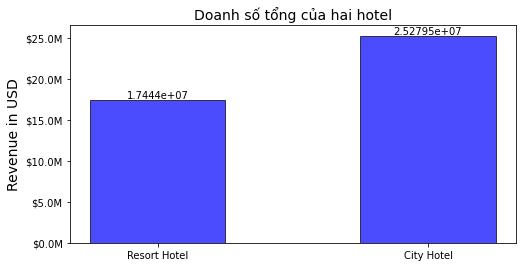

In [261]:
# Vẽ biểu đồ cột thể hiện doanh thu của 2 loại hotel


fig, ax = plt.subplots(figsize = (8,4))
ax.bar(list(revenue_by_hotel.keys()),[np.sum(revenue_by_hotel[hotel]) for hotel in revenue_by_hotel],color = 'blue',alpha= 0.7, edgecolor = "k", width = 0.5)
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Revenue in USD',fontsize = 14)

#Hiện giá trị lên từng cột
ax.bar_label(container = ax.containers[0])

plt.title('Doanh số tổng của hai hotel', fontsize = 14)
plt.show()